# [Nike, Adidas and Converse Shoes](https://www.kaggle.com/datasets/die9origephit/nike-adidas-and-converse-imaged)

In [73]:
import random, os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torch.optim as optim

from torchsummary import summary

## Device Setting

In [74]:
if torch.cuda.is_available():
  DEVICE = torch.device('cuda:0')
else:
  DEVICE = torch.device('cpu')
  
print('Pytorch Version: ', torch.__version__, '\nDEVICE: ', DEVICE)

Pytorch Version:  1.12.1+cpu 
DEVICE:  cpu


## Download Data From Kaggle

In [75]:
!poetry show kaggle

 name         : kaggle     
 version      : 1.5.12     
 description  : Kaggle API 

dependencies
 - certifi *
 - python-dateutil *
 - python-slugify *
 - requests *
 - six >=1.10
 - tqdm *
 - urllib3 *


In [76]:
os.environ['KAGGLE_USERNAME'] = 'kkkkkkkiii'
os.environ['KAGGLE_KEY'] = 'd461c5cd001e10f5176dada78f710769'

In [77]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

In [78]:
api.dataset_download_files('die9origephit/nike-adidas-and-converse-imaged', path="./dataset")

In [79]:
import zipfile


zipfile.ZipFile('./dataset/nike-adidas-and-converse-imaged.zip').extractall(path='./dataset/')

In [80]:
print(os.listdir('./dataset'))
print(os.listdir('./dataset/train/'))

['nike-adidas-and-converse-imaged.zip', 'test', 'train']
['adidas', 'converse', 'nike']


In [81]:
train_data = datasets.ImageFolder(root=os.path.join(os.getcwd(), 'dataset/train/'), transform=transforms.ToTensor())
test_data = datasets.ImageFolder(root=os.path.join(os.getcwd(), 'dataset/test/'), transform=transforms.ToTensor())

In [82]:
# Hyperparameter
BATCH_SIZE=64
EPOCHS=10

In [83]:
train_loader=DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader=DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

## Check Data

In [84]:
print('train data size : ', len(train_data))
print('test data size : ', len(test_data))

train data size :  711
test data size :  114


In [61]:
train_data.class_to_idx

{'adidas': 0, 'converse': 1, 'nike': 2}

In [62]:
# reverse (mapping idx to class)
idx2class = {v: k for k, v in train_data.class_to_idx.items()}
idx2class

{0: 'adidas', 1: 'converse', 2: 'nike'}

In [85]:
for (X_train, y_train) in train_loader:
  print(f'Shape of X_train [N, C, H, W] : {X_train.shape}', f'\nType of X_train : {X_train.dtype}\n')  # X_train.type() : torch.FloatTensor
  print(f'Shape of y_train [N, C, H, W] : {y_train.shape}', f'\nType of y_train : {y_train.dtype}')  # y_traon.type() : torch.LongTensor
  break

# [Mini-Batch, Channel, Height, Width]

Shape of X_train [N, C, H, W] : torch.Size([64, 3, 240, 240]) 
Type of X_train : torch.float32

Shape of y_train [N, C, H, W] : torch.Size([64]) 
Type of y_train : torch.int64


In [86]:
for (X_test, y_test) in test_loader:
  print(f'Shape of X_test [N, C, H, W] : {X_test.shape}', f'\nType of X_test : {X_test.dtype}\n')  
  print(f'Shape of y_test [N, C, H, W] : {y_test.shape}', f'\nType of y_test : {y_test.dtype}') 
  break

Shape of X_test [N, C, H, W] : torch.Size([64, 3, 240, 240]) 
Type of X_test : torch.float32

Shape of y_test [N, C, H, W] : torch.Size([64]) 
Type of y_test : torch.int64


Text(0.5, 1.0, 'adidas')

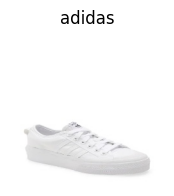

In [95]:
image, label = next(iter(train_data))
# [3, 240, 240] => [240, 240, 3]
plt.figure(figsize=(2, 2))
plt.axis('off')
plt.imshow(np.transpose(image, (1, 2, 0)))
plt.title(idx2class[label])

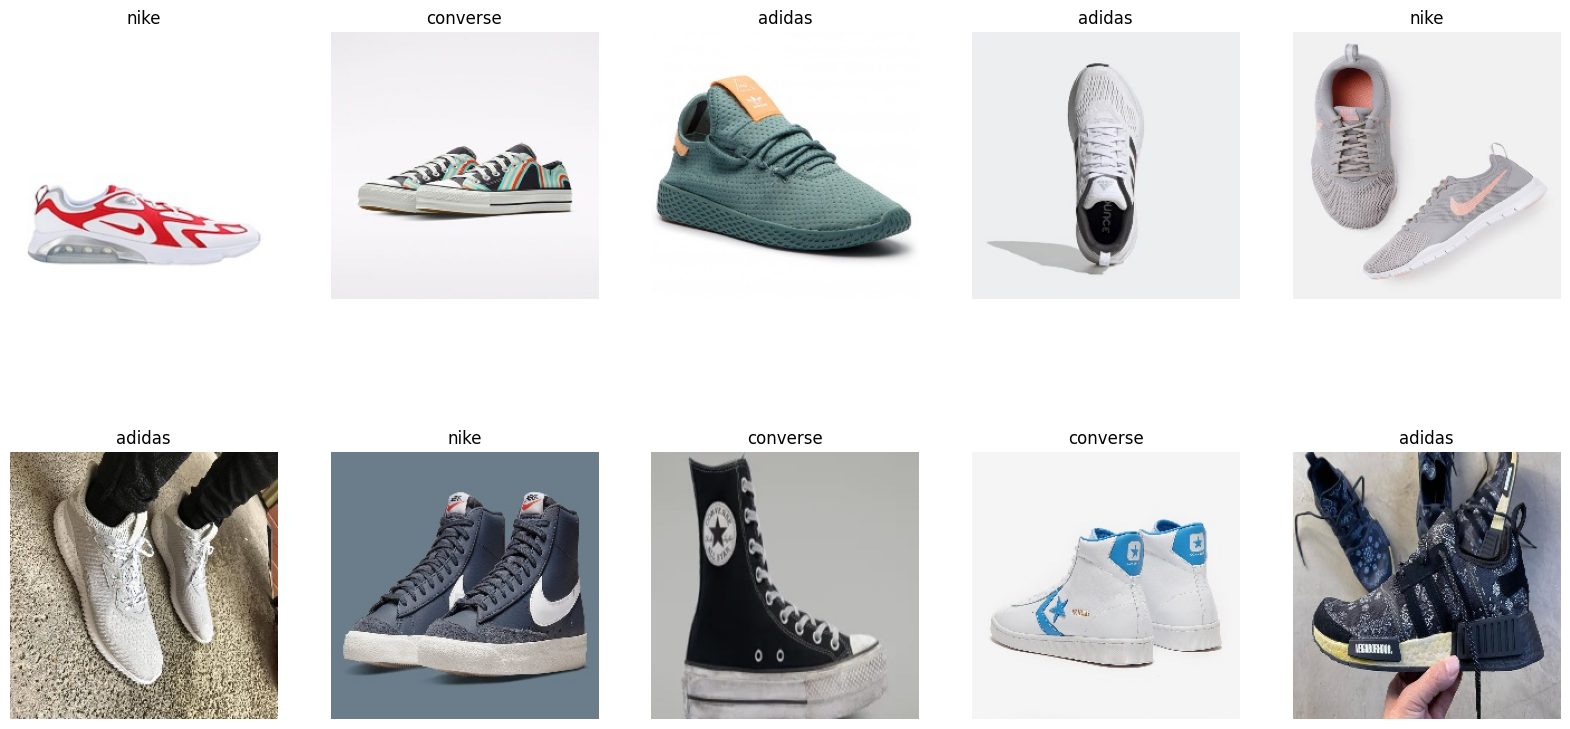

In [104]:
plt.figure(figsize=(20, 10))

for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.axis('off')
  plt.imshow(np.transpose(X_train[i], (1, 2, 0)), )  
  plt.title(idx2class[y_train[i].item()])

In [63]:
count_dict = {k:0 for k, v in train_data.class_to_idx.items()}
print(count_dict)

for img, label_idx in train_data:
    label = idx2class[label_idx]
    count_dict[label] += 1
print(count_dict)

{'adidas': 0, 'converse': 0, 'nike': 0}
{'adidas': 237, 'converse': 237, 'nike': 237}


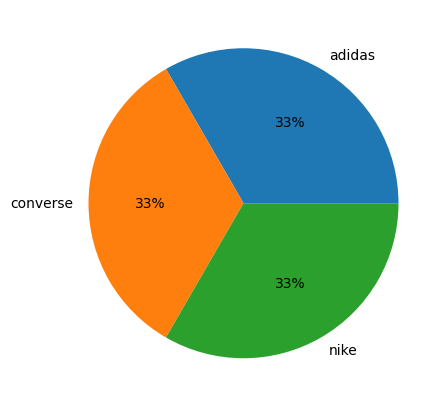

In [64]:
classes = list(count_dict.keys())
count = list(count_dict.values())

plt.figure(figsize=(5, 10))
plt.pie(count, labels=classes, autopct='%.f%%');

In [65]:
def get_class_distribution(data, idx, title):
  idx2class = {v: k for k, v in data.class_to_idx.items()}
  count_dict = {k:0 for k, v in data.class_to_idx.items()}

  for img, label_idx in data:
    label = idx2class[label_idx]
    count_dict[label] += 1
  
  classes = list(count_dict.keys())
  count = list(count_dict.values())
  plt.subplot(1, 2, idx)
  plt.pie(count, labels=classes, autopct='%.f%%')
  plt.title(title);

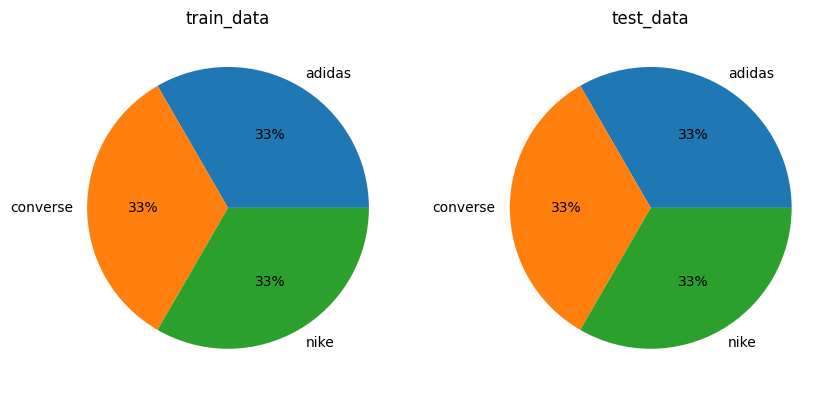

In [66]:
plt.figure(figsize=(10, 20))

get_class_distribution(train_data, 1, 'train_data')
get_class_distribution(test_data, 2, 'test_data')